## Naive Bayes Classification

In [ ]:
# Import libraries
import pandas as pd

# read the dataset from google drive
from google.colab import drive
drive.mount('/content/drive')
diabetes = pd.read_csv("/content/drive/My Drive/EDHEC/Machine Learning/scripts & data/diabetes.csv")

# Show top 5-records
diabetes.head()


Mounted at /content/drive


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Import libraries
import pandas as pd

# read the dataset from computer
# After running this code, a "Choose Files" button will appear.
# Click it and select the files from your computer that you want to upload.
from google.colab import files
uploaded = files.upload()
diabetes = pd.read_csv("diabetes.csv")

# Show top 5-records
diabetes.head()

Saving diabetes.csv to diabetes.csv


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# split dataset in two parts: feature set and target label
feature_set = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
features = diabetes[feature_set]
target = diabetes.label

import random
import numpy as np
# Set random seed for Python's random module
random.seed(42)
# Set random seed for NumPy's random module
np.random.seed(42)

# partition data into training and testing set
from sklearn.model_selection import train_test_split
feature_train,feature_test, target_train, target_test = \
train_test_split(features, target, test_size=0.3, random_state=42)

In [3]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(feature_train,target_train)

# Forecast the target variable for given test dataset
predictions = model.predict(feature_test)

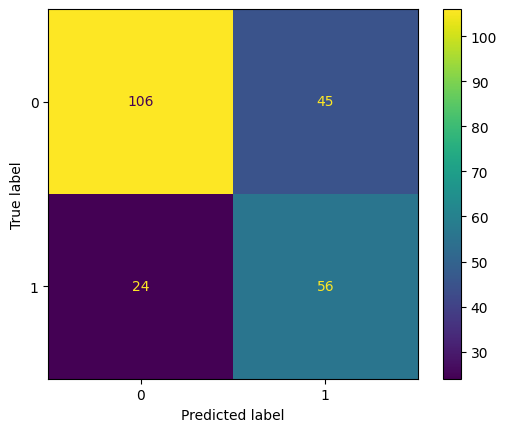

In [5]:
# Import the commands for the confusion matrix calculation and display
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# calculate the confusion matrix
cm = confusion_matrix(target_test, predictions)
# prepare the plot of the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
# display the plot of the confusion matrix
disp.plot()

In [6]:
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Calculate model accuracy
print("Accuracy:",accuracy_score(target_test, predictions))
# Calculate model precision
print("Precision:",precision_score(target_test, predictions))
# Calculate model recall
print("Recall:",recall_score(target_test, predictions))
# Calculate model f1 score
print("F1-Score:",f1_score(target_test, predictions))

Accuracy: 0.7012987012987013
Precision: 0.5544554455445545
Recall: 0.7
F1-Score: 0.6187845303867403


## Decision Tree Classification

In [7]:
# Import Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier object
model = DecisionTreeClassifier()

# Train the model using training dataset
model = model.fit(feature_train,target_train)

# Predict the response for test dataset
predictions = model.predict(feature_test)

# Calculate model accuracy
print("Accuracy:",accuracy_score(target_test, predictions))
# Calculate model precision
print("Precision:",precision_score(target_test, predictions))
# Calculate model recall
print("Recall:",recall_score(target_test, predictions))
# Calculate model f1 score
print("F1-Score:",f1_score(target_test, predictions))

# Predict the response for train dataset
predictions_train = model.predict(feature_train)

# Calculate model accuracy
print("Test Accuracy:",accuracy_score(target_test, predictions))
print("Training Accuracy:",accuracy_score(target_train, predictions_train))


Accuracy: 0.70995670995671
Precision: 0.5670103092783505
Recall: 0.6875
F1-Score: 0.6214689265536724
Test Accuracy: 0.70995670995671
Training Accuracy: 1.0


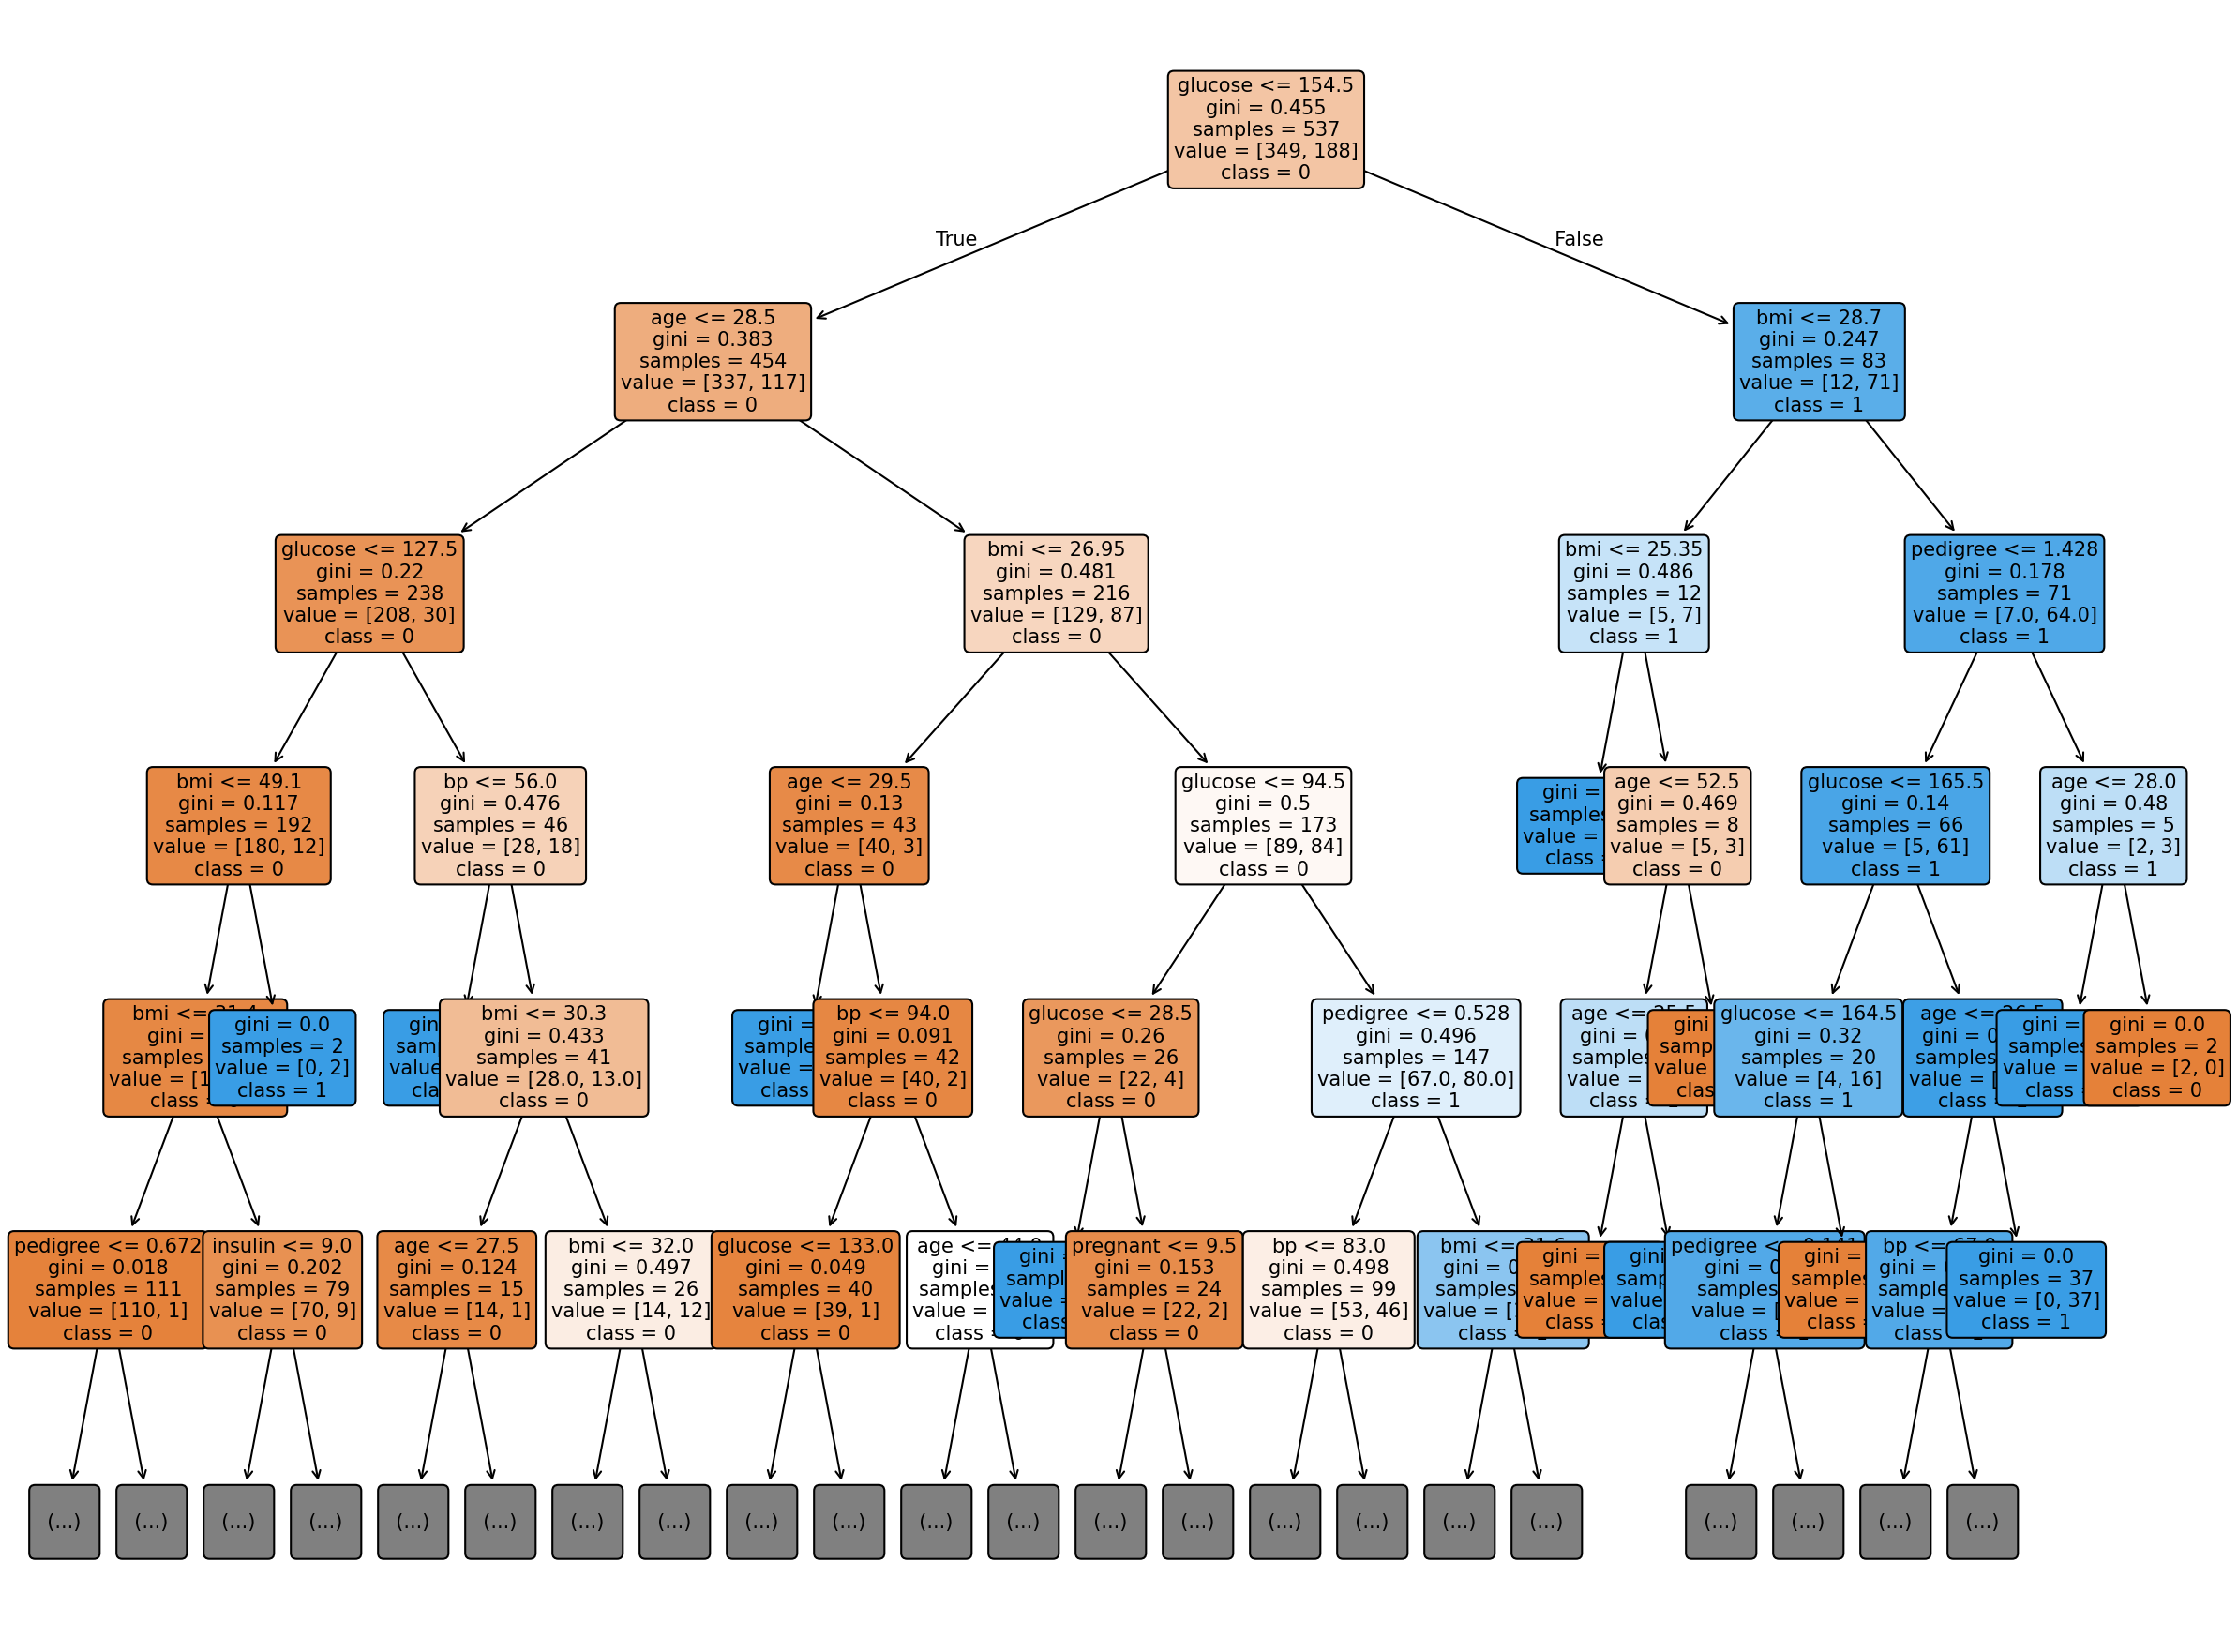

In [8]:
# display the estimated decisition tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15), dpi=150)  # Increase figure size and DPI
plot_tree(model, feature_names=features.columns, class_names=model.classes_.astype(str),
          filled=True, rounded=True, fontsize=10, max_depth=5)  # Adjust font size, and maximum depth
plt.show()

Accuracy: 0.7056277056277056
Precision: 0.56
Recall: 0.7
F1-Score: 0.6222222222222222
Test Accuracy: 0.7056277056277056
Training Accuracy: 1.0


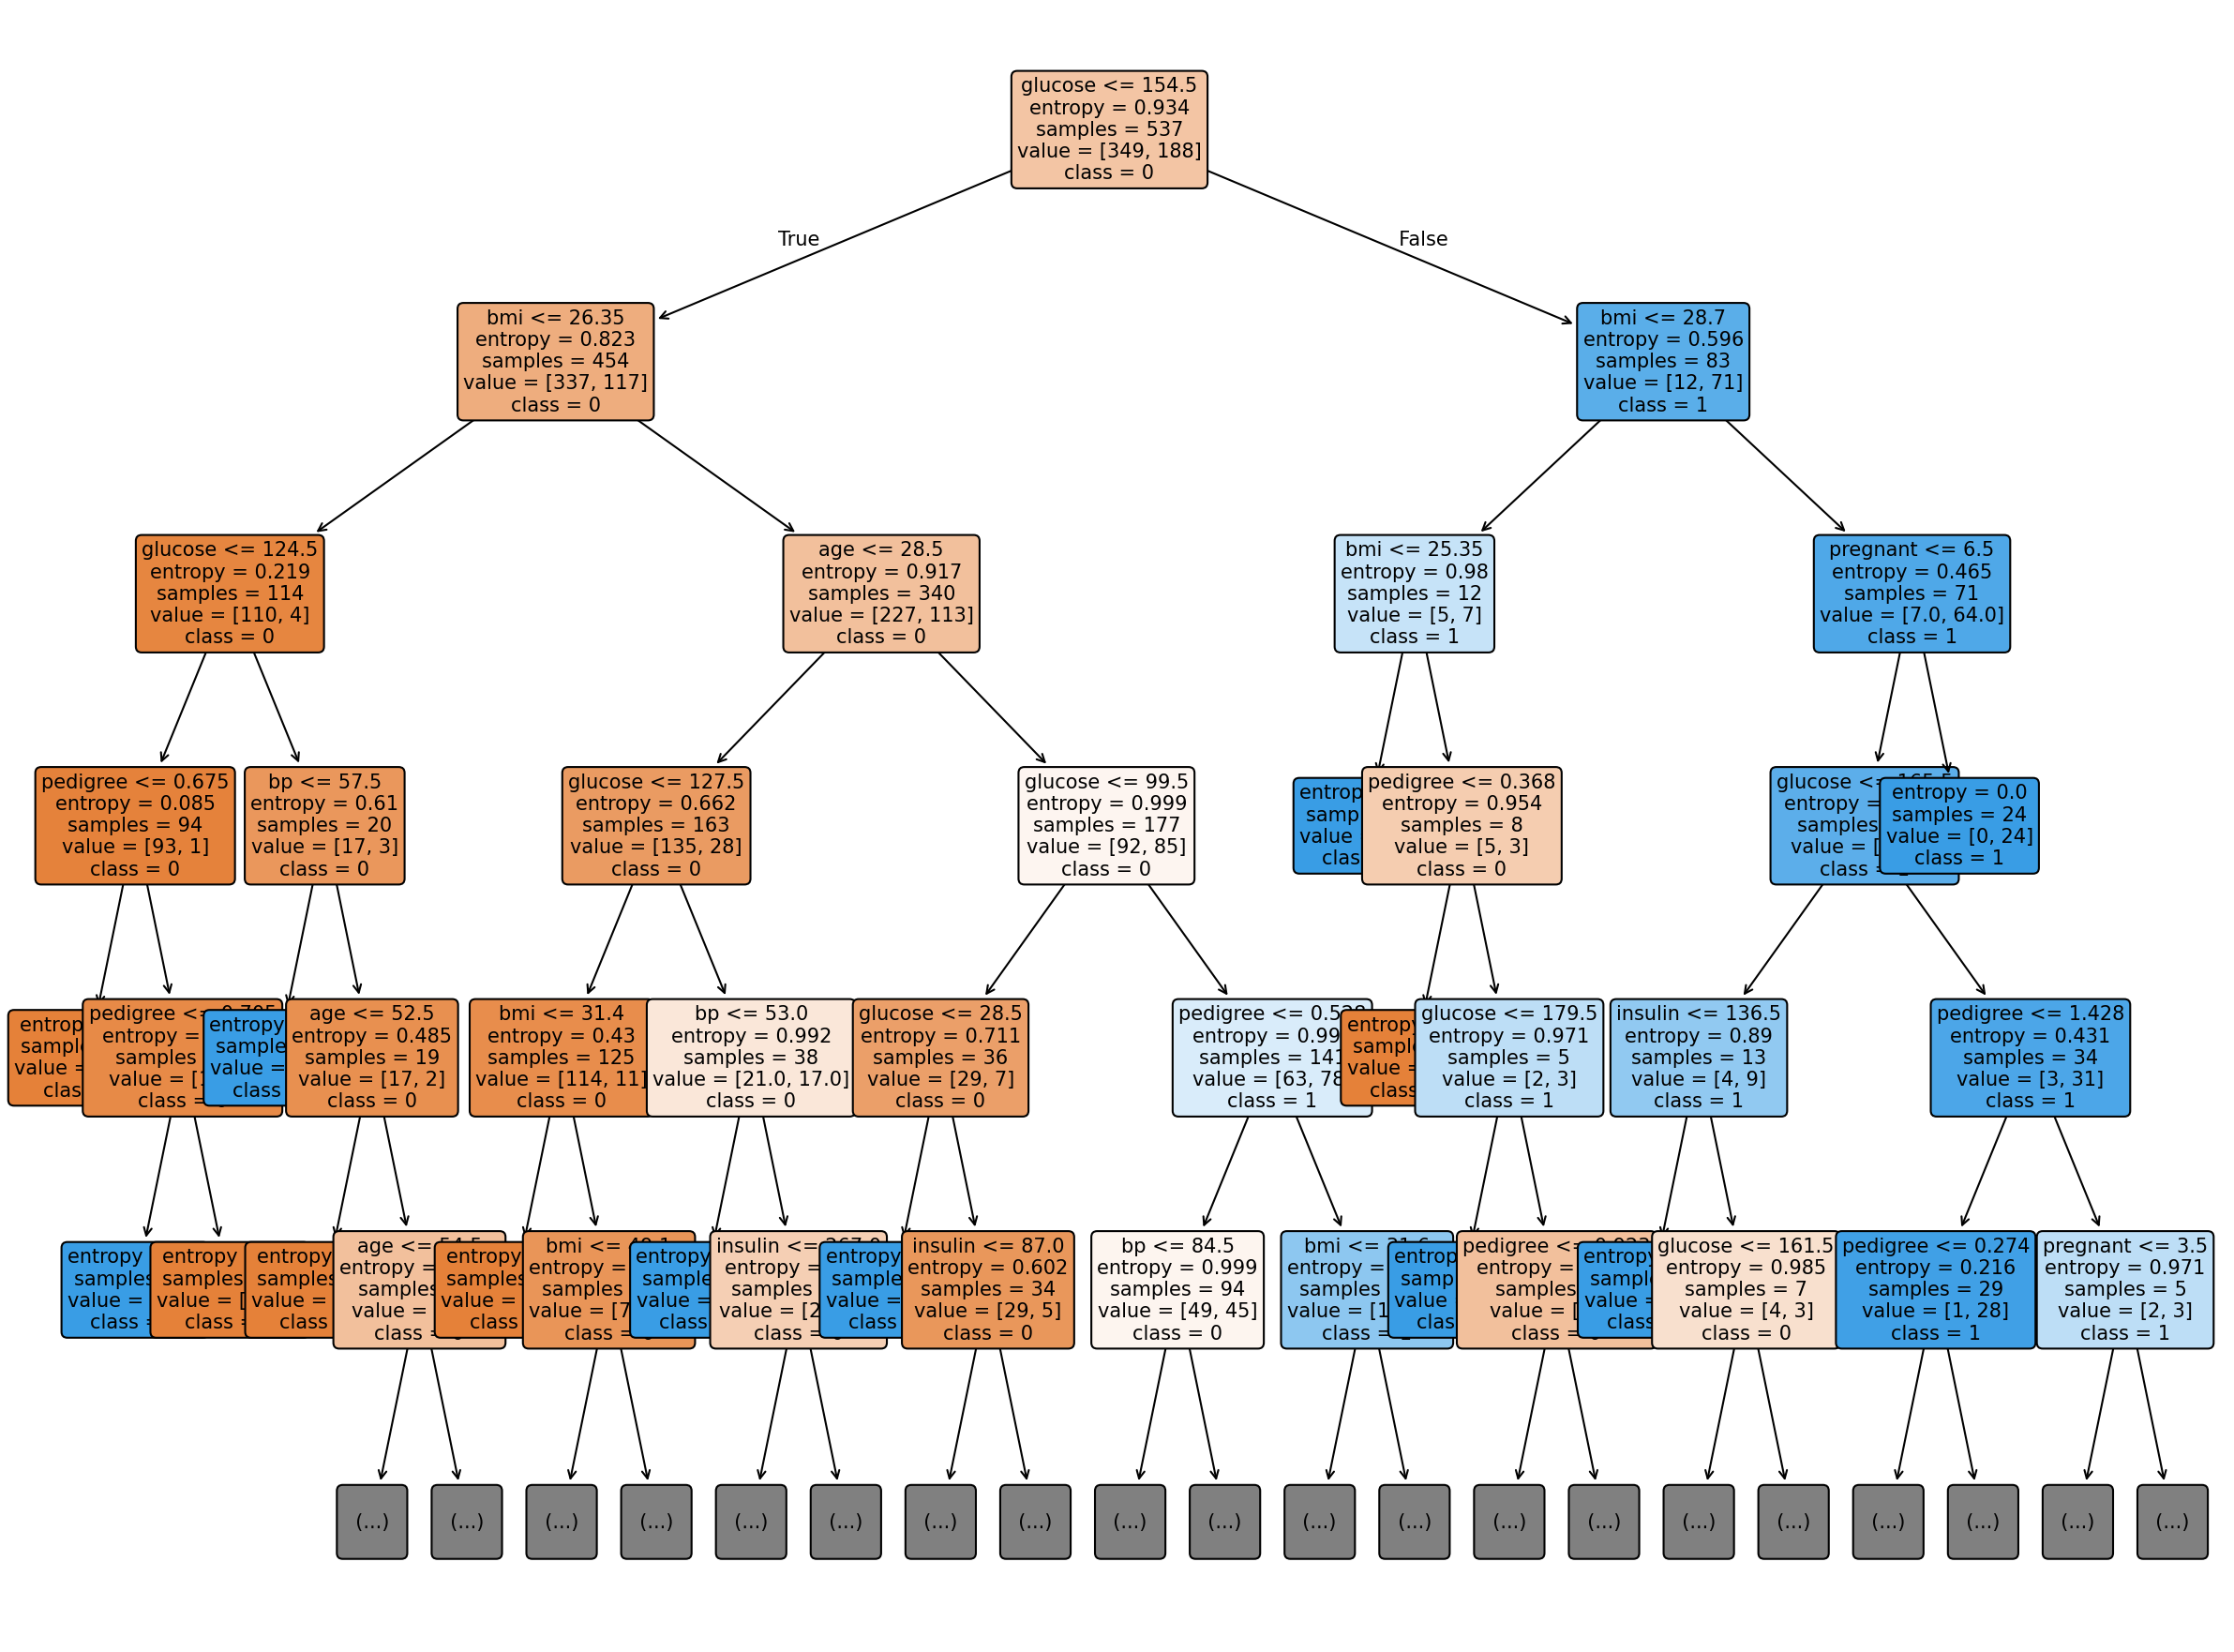

In [9]:
# use entropy measure instead of default gini measure

# Import Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier object
modelentropy = DecisionTreeClassifier(criterion='entropy')

# Train the model using training dataset
modelentropy = modelentropy.fit(feature_train,target_train)

# Predict the response for test dataset
predictionsentropy = modelentropy.predict(feature_test)

# Predict the response for train dataset
predictionsentropy_train = modelentropy.predict(feature_train)

# Calculate model accuracy
print("Accuracy:",accuracy_score(target_test, predictionsentropy))
# Calculate model precision
print("Precision:",precision_score(target_test, predictionsentropy))
# Calculate model recall
print("Recall:",recall_score(target_test, predictionsentropy))
# Calculate model f1 score
print("F1-Score:",f1_score(target_test, predictionsentropy))

# Calculate model accuracy
print("Test Accuracy:",accuracy_score(target_test, predictionsentropy))
print("Training Accuracy:",accuracy_score(target_train, predictionsentropy_train))

# display the estimated decisition tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15), dpi=150)  # Increase figure size and DPI
plot_tree(modelentropy, feature_names=features.columns, class_names=modelentropy.classes_.astype(str),
          filled=True, rounded=True, fontsize=10, max_depth=5)  # Adjust font size, and maximum depth
plt.show()


Test Accuracy: 0.7186147186147186
Training Accuracy: 0.7597765363128491


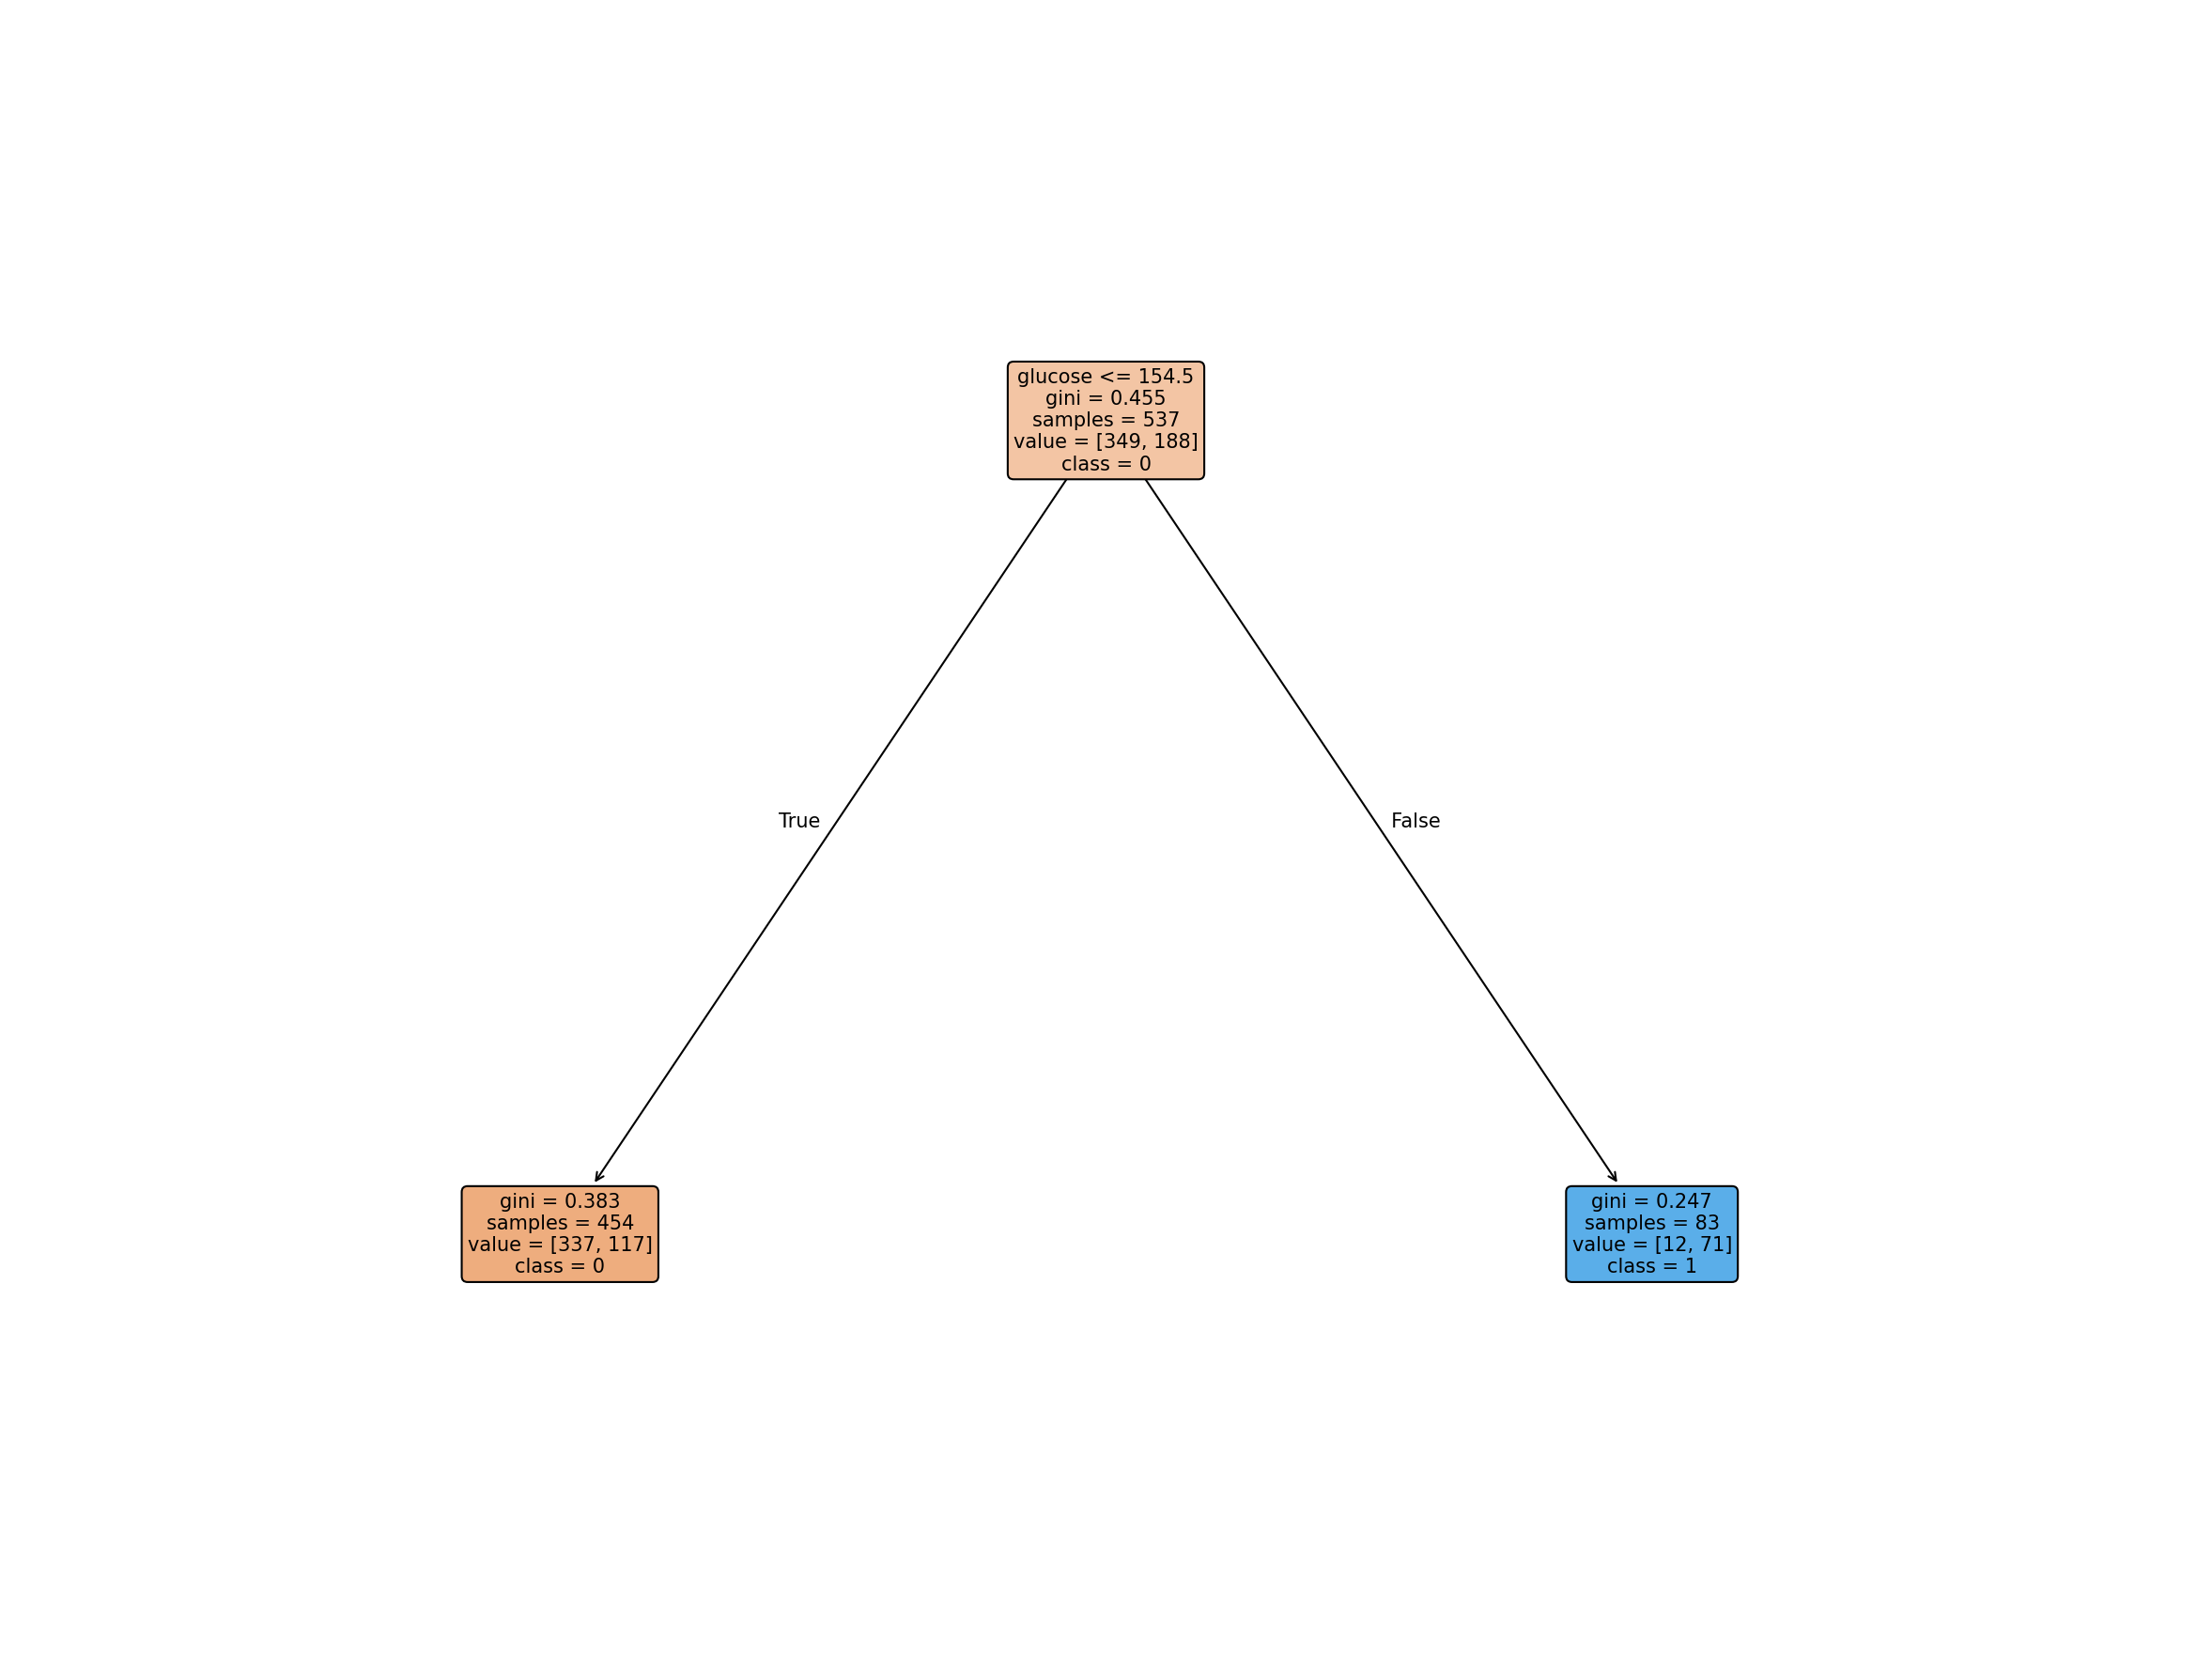

In [10]:
# redo the tree with max_depth=1

# Import Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier object
model1 = DecisionTreeClassifier(max_depth=1, random_state=42)

# Train the model using training dataset
model1 = model1.fit(feature_train,target_train)

# Predict the response for test dataset
predictions1 = model1.predict(feature_test)

# Predict the response for train dataset
predictions1_train = model1.predict(feature_train)

# Calculate model accuracy
print("Test Accuracy:",accuracy_score(target_test, predictions1))
print("Training Accuracy:",accuracy_score(target_train, predictions1_train))

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15), dpi=150)  # Increase figure size and DPI
plot_tree(model1, feature_names=features.columns, class_names=model1.classes_.astype(str),
          filled=True, rounded=True, fontsize=10, max_depth=5)  # Adjust font size, and maximum depth
plt.show()

Test Accuracy: 0.7186147186147186
Training Accuracy: 0.7597765363128491


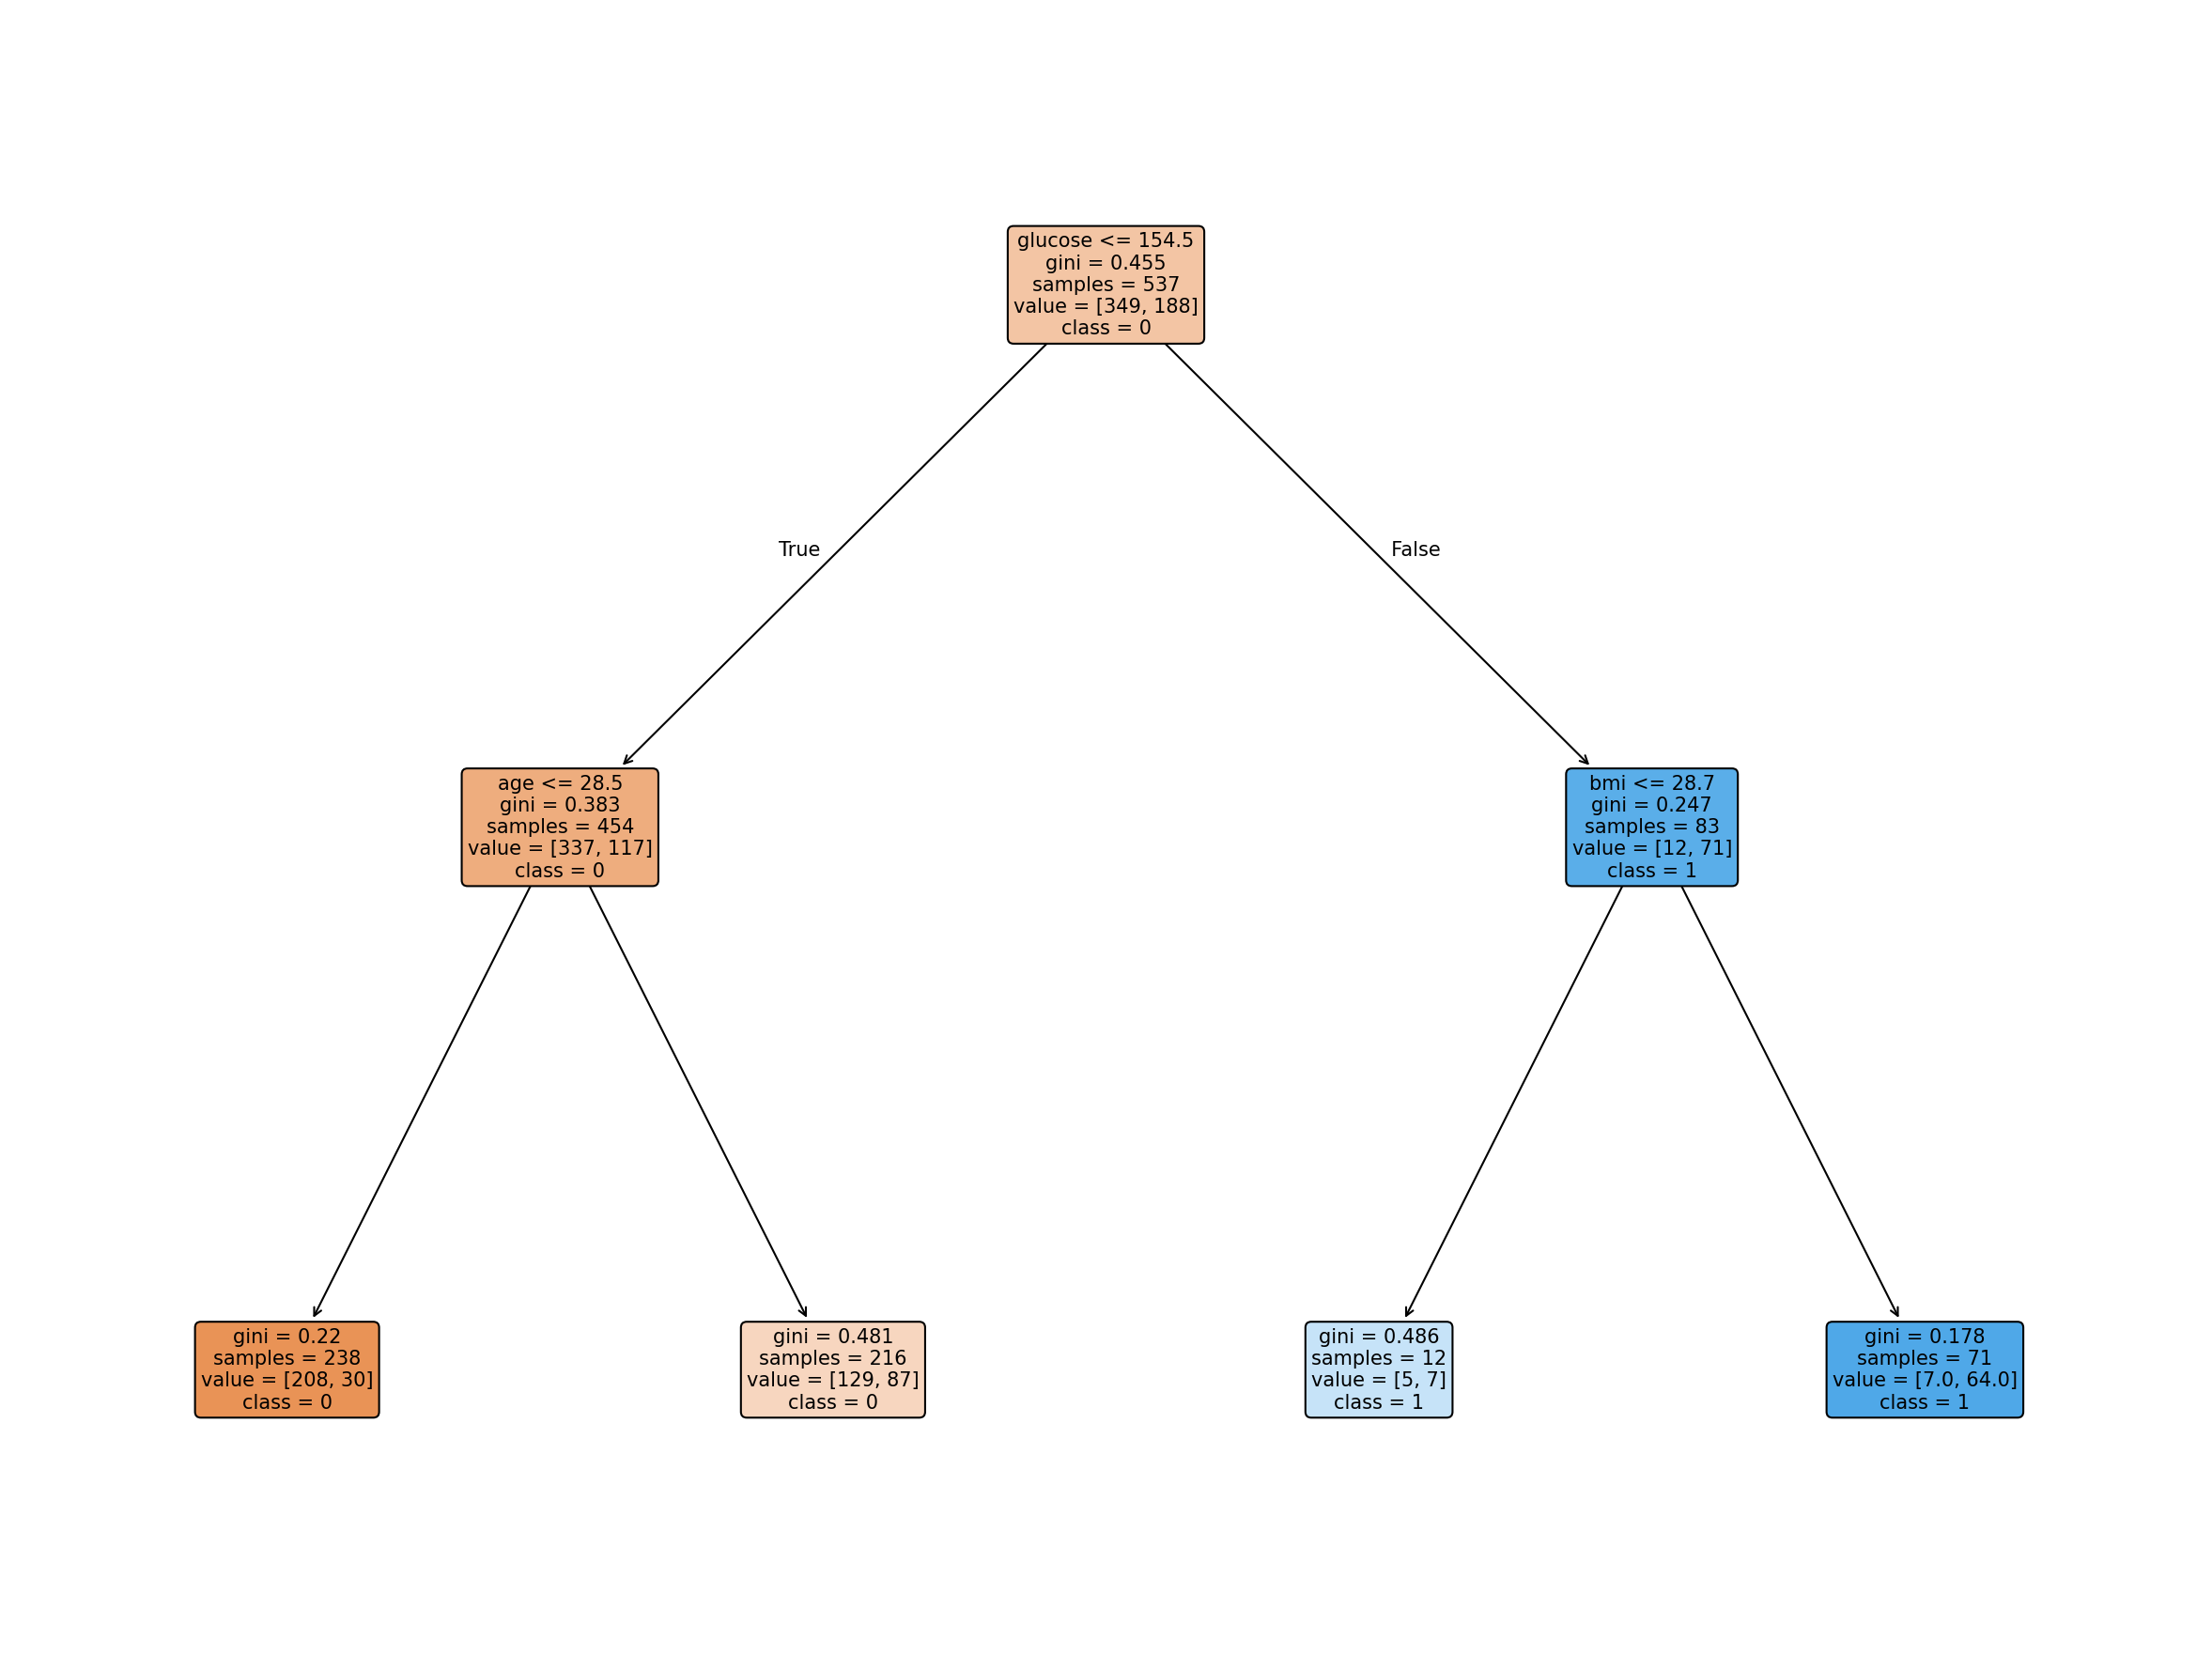

In [11]:
# redo the tree with max_depth=2

# Import Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier object
model2 = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the model using training dataset
model2 = model2.fit(feature_train,target_train)

# Predict the response for test dataset
predictions2 = model2.predict(feature_test)

# Predict the response for train dataset
predictions2_train = model2.predict(feature_train)

# Calculate model accuracy
print("Test Accuracy:",accuracy_score(target_test, predictions2))
print("Training Accuracy:",accuracy_score(target_train, predictions2_train))

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15), dpi=150)  # Increase figure size and DPI
plot_tree(model2, feature_names=features.columns, class_names=model2.classes_.astype(str),
          filled=True, rounded=True, fontsize=10, max_depth=5)  # Adjust font size, and maximum depth
plt.show()

In [10]:
from sklearn.model_selection import cross_val_score

# Assuming 'model1' is your DecisionTreeClassifier with max_depth=1
# and 'model2' is your DecisionTreeClassifier with max_depth=2

scores1 = cross_val_score(model1, features, target, cv=5)  # 5-fold cross-validation
scores2 = cross_val_score(model2, features, target, cv=5)  # 5-fold cross-validation

print("Cross-validation scores (max_depth=1):", scores1)
print("Average accuracy (max_depth=1):", scores1.mean())

print("Cross-validation scores (max_depth=2):", scores2)
print("Average accuracy (max_depth=2):", scores2.mean())

Cross-validation scores (max_depth=1): [0.68181818 0.71428571 0.71428571 0.75163399 0.75163399]
Average accuracy (max_depth=1): 0.7227315168491639
Cross-validation scores (max_depth=2): [0.73376623 0.71428571 0.74025974 0.75163399 0.74509804]
Average accuracy (max_depth=2): 0.7370087428910959


## K-Nearest Neighbors Classification

In [ ]:
# Import KNN model
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier object
model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training dataset
model.fit(feature_train,target_train)

# Predict the target variable for test dataset
predictions = model.predict(feature_test)

# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Calculate model accuracy
print("Accuracy:",accuracy_score(target_test, predictions))
# Calculate model precision
print("Precision:",precision_score(target_test, predictions))
# Calculate model recall
print("Recall:",recall_score(target_test, predictions))
# Calculate model f1 score
print("F1-Score:",f1_score(target_test, predictions))

Accuracy: 0.670995670995671
Precision: 0.5308641975308642
Recall: 0.5308641975308642
F1-Score: 0.5308641975308642
